In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import numba

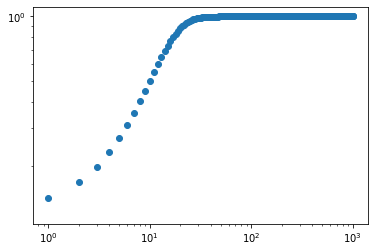

In [3]:
def sigmoid(x, theta3): 
    theta1 = 1
    theta2 = 0.2
    xi = 1
    return theta1/(1+xi*np.exp(-theta2*(x-theta3)))**(1/xi)

x = np.array(range(1000))
plt.scatter(x, (sigmoid(x,10)))
plt.loglog()
plt.show()

In [4]:
class vector():
    def __init__(self, vec):
        self.x = vec[0]
        self.y = vec[1]
        self.z = vec[2]
        
    def absValue(self):
        return (self.x**2+self.y**2+self.z**2)**0.5

class particle():
    def __init__(self, gyro_radius, free_mean_path_para, free_mean_path_perp):
        self.pos = vector([0,0,0])
        #self.t = 0
        self.direction = vector([1,1,1])
        self.gyro_radius = gyro_radius
        self.free_mean_path_para = free_mean_path_para
        self.free_mean_path_perp = free_mean_path_perp
        self.t = 0
            
        
    def move(self, step_size):
        p = 1.0*step_size
        self.t = self.t + 1*step_size
        
        if sigmoid(self.t, self.gyro_radius) >= random.random():
            # after gyroradius ~ half gyroorbit, particle 
            # needs to change direction perp to background field
            if (random.randint(0, self.free_mean_path_perp) == 1):
                self.direction.x = self.direction.x*(-1)
            if (random.randint(0, self.free_mean_path_perp) == 0):
                self.direction.y = self.direction.y*(-1)
        if sigmoid(self.t, self.free_mean_path_para) >= random.random():
            # after mean-free length, particle can also change 
            # direction parallel to mean field
            if (random.randint(0, self.free_mean_path_para) == 0):
                self.direction.z = self.direction.z*(-1)
            
        absDirection = self.direction.absValue()
        
        #if direction == 0:
        self.pos.x = self.pos.x + p*self.direction.x/absDirection
        self.pos.y = self.pos.y + p*self.direction.y/absDirection
        self.pos.z = self.pos.z + p*self.direction.z/absDirection

In [28]:
pos = [0,0]
steps = 10**4
t_max = 10**4
time = np.linspace(1, t_max, steps)
step = t_max / steps
old_time = 0

gyro_radius = 30
free_mean_path_para = 200
free_mean_path_perp = 10

# particles
particles = []
for j in range(50):
    particles.append(particle(gyro_radius, free_mean_path_para, free_mean_path_perp))

In [29]:
def run_simulation(particles, time):
    kappa_perp = []
    kappa_para = []
    for i, t in enumerate(time):
        for p in particles:
            p.move(step)

        kappa_perp.append(np.mean([(p.pos.x**2+p.pos.y**2)/2.0 for p in particles])/t)
        kappa_para.append(np.mean([(p.pos.z**2) for p in particles])/t)
    return [kappa_para, kappa_perp]

In [ ]:
%timeit kappa = run_simulation(particles, time)
kappa_para = kappa[0]
kappa_perp = kappa[1]

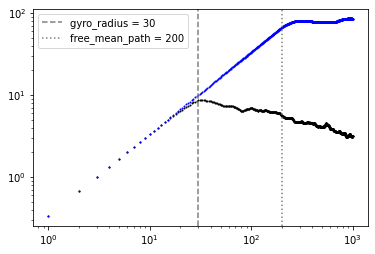

In [24]:
plt.scatter(time, kappa_perp, c='k', s=1)
#plt.scatter(range(1,n), kappa_y, c='r')
plt.scatter(time, kappa_para, c='b', s=1)
plt.axvline(x=gyro_radius, color = 'grey', ls='--', label='gyro_radius = '+str(gyro_radius))
plt.axvline(x=free_mean_path_para, color = 'grey', ls=':', label='free_mean_path = '+str(free_mean_path_para))
plt.xscale('log')
plt.yscale('log')
plt.legend('$d$ [pc]')
plt.legend()
plt.show()

In [23]:
print(np.mean(kappa_perp[-1000:-1]))
print(np.mean(kappa_para[-1000:-1]))

6.17408014187606
212.2834830327214
